# Project | Qualitative Bankruptcy
    -- Anish Babu Kuppuswamy

In [524]:
import numpy as np
import pandas as pd
import io
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns;

import warnings
warnings.filterwarnings("ignore")

In [525]:
df = pd.read_csv("Qualitative_Bankruptcy.data.txt", delimiter = ",", names = ["IR", "MR", "FR", "CRR", "COR", "OR", "Class"])
df.shape

(250, 7)

In [526]:
df.head()

,IR,MR,FR,CRR,COR,OR,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
    1. Industrial Risk (IR)
    2. Management Risk (MR)
    3. Financial Flexibility (FR)
    4. Credibility (CRR)
    5. Competitiveness (COR)
    6. Operating Risk (OR)
    7. Class (Target Variable)

In [527]:
df["Class"].unique()

array(['NB', 'B'], dtype=object)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FR       250 non-null object
CRR      250 non-null object
COR      250 non-null object
OR       250 non-null object
Class    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


The data set contains 7 columns and 250 rows. No null values observed.

In [529]:
df.describe()

,IR,MR,FR,CRR,COR,OR,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


Shows no missing value.

In [530]:
df["Class"].value_counts()

NB    143
B     107
Name: Class, dtype: int64

Encoding Independent variables

In [531]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [532]:
df["IR"]= label_encoder.fit_transform(df["IR"])
df["MR"]= label_encoder.fit_transform(df["MR"])
df["FR"]= label_encoder.fit_transform(df["FR"])
df["CRR"]= label_encoder.fit_transform(df["CRR"])
df["COR"]= label_encoder.fit_transform(df["COR"])
df["OR"]= label_encoder.fit_transform(df["OR"])

In [533]:
df.head()

,IR,MR,FR,CRR,COR,OR,Class
0,2,2,0,0,0,2,NB
1,1,1,0,0,0,1,NB
2,0,0,0,0,0,0,NB
3,2,2,2,2,2,2,NB
4,1,1,2,2,2,1,NB


Splitting Independent variables from Dependent variables

In [534]:
BR_df = df.drop("Class",axis=1)
BR_df.head()

,IR,MR,FR,CRR,COR,OR
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


Performing One-hot encoding to avoid generation of priority issue in training of data sets.

In [535]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [536]:
X = pd.DataFrame(onehotencoder.fit_transform(BR_df).toarray())
Y = pd.DataFrame(df["Class"])

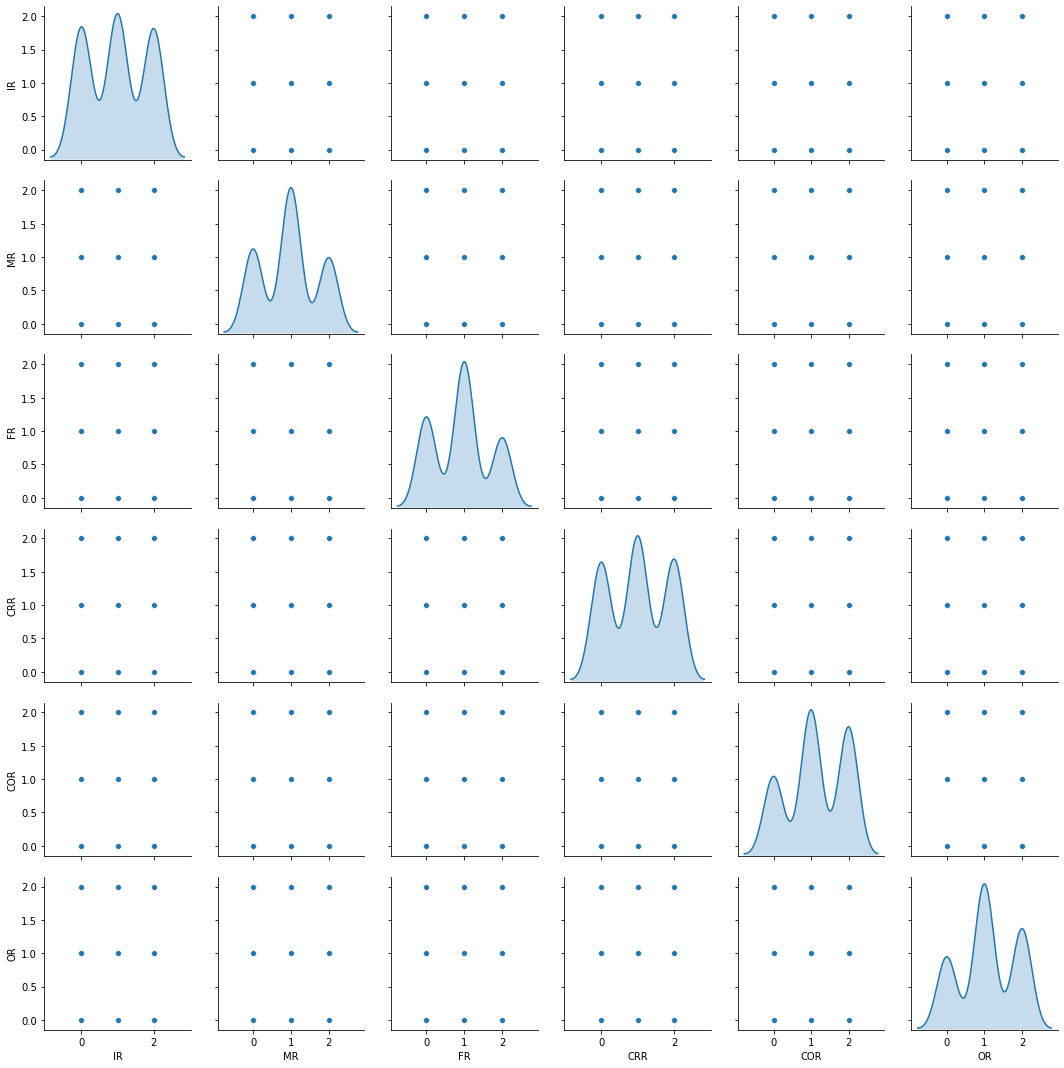

In [537]:
sns.pairplot(df, diag_kind='kde')

Three classes evidently observed among features

Splitting the dataset into Training data and Test data

In [538]:
from sklearn.model_selection import train_test_split

In [539]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [540]:
print(x_train.shape)
print(y_train.shape)

(175, 18)
(175, 1)


In [541]:
print(x_test.shape)
print(y_test.shape)

(75, 18)
(75, 1)


Applying PCA on the Independent features of the training data

In [542]:
# Create covariance matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets

In [543]:
xtrain_std = StandardScaler().fit_transform(x_train)

In [544]:
cov_matrix = np.cov(xtrain_std.T)
# print('Covariance Matrix \n', cov_matrix)

In [545]:
# Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [546]:
print('\n Eigen Values \n', eig_vals)


 Eigen Values 
 [ 4.53054678e+00+0.00000000e+00j  2.23667411e+00+0.00000000e+00j
  2.13782159e-01+0.00000000e+00j  4.50828668e-01+0.00000000e+00j
  1.89448924e+00+0.00000000e+00j  1.75361184e+00+0.00000000e+00j
  7.97990777e-01+0.00000000e+00j  1.51722435e+00+0.00000000e+00j
  1.37615812e+00+0.00000000e+00j  1.32395202e+00+0.00000000e+00j
  9.66664511e-01+0.00000000e+00j  1.04152569e+00+0.00000000e+00j
 -1.18679340e-15+0.00000000e+00j  7.29326880e-16+0.00000000e+00j
  4.48839448e-16+0.00000000e+00j  1.41150675e-16+0.00000000e+00j
 -4.46667095e-16+4.20086303e-17j -4.46667095e-16-4.20086303e-17j]


In [547]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [548]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.02587747+0.00000000e+00j  37.38083922+0.00000000e+00j
  47.84563694+0.00000000e+00j  57.53225474+0.00000000e+00j
  65.91311305+0.00000000e+00j  73.5147484 +0.00000000e+00j
  80.82800716+0.00000000e+00j  86.5811967 +0.00000000e+00j
  91.92086733+0.00000000e+00j  96.32881639+0.00000000e+00j
  98.81910808+0.00000000e+00j 100.        +0.00000000e+00j
 100.        +0.00000000e+00j 100.        +0.00000000e+00j
 100.        +0.00000000e+00j 100.        +2.32047672e-16j
 100.        +0.00000000e+00j 100.        +0.00000000e+00j]


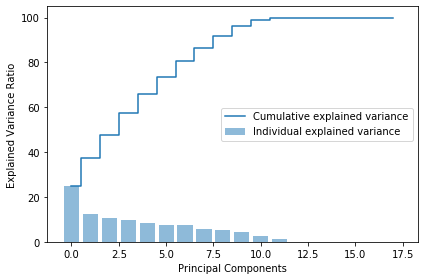

In [549]:
plt.figure(figsize=(6 , 4))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

The first 10 principal components explains around 96% as shown above

Transforming data to the components formed

In [550]:
bc_arr = np.array(x_train)
bc_centered = bc_arr - bc_arr.mean(axis=0)
bc_centered

array([[-0.33714286,  0.63428571, -0.29714286, ...,  0.75428571,
        -0.41142857, -0.34285714],
       [-0.33714286,  0.63428571, -0.29714286, ...,  0.75428571,
        -0.41142857, -0.34285714],
       [-0.33714286,  0.63428571, -0.29714286, ...,  0.75428571,
        -0.41142857, -0.34285714],
       ...,
       [-0.33714286, -0.36571429,  0.70285714, ..., -0.24571429,
        -0.41142857,  0.65714286],
       [ 0.66285714, -0.36571429, -0.29714286, ...,  0.75428571,
        -0.41142857, -0.34285714],
       [ 0.66285714, -0.36571429, -0.29714286, ...,  0.75428571,
        -0.41142857, -0.34285714]])

In [551]:
pca = PCA(n_components=10)
pca.fit(xtrain_std)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [552]:
bc_pca = pca.transform(xtrain_std)

In [553]:
bc_pca.shape

(175, 10)

In [554]:
bc_pca_dff = pd.DataFrame(bc_pca)

In [555]:
pca.explained_variance_

array([4.53054678, 2.23667411, 1.89448924, 1.75361184, 1.51722435,
       1.37615812, 1.32395202, 1.04152569, 0.96666451, 0.79799078])

In [556]:
pca.explained_variance_ratio_

array([0.25025877, 0.12354962, 0.10464798, 0.09686618, 0.08380858,
       0.07601635, 0.07313259, 0.0575319 , 0.05339671, 0.04407949])

In [557]:
# br_pca_df = pd.DataFrame(pca.components_)

In [558]:
br_pcadf = pd.DataFrame(bc_pca)

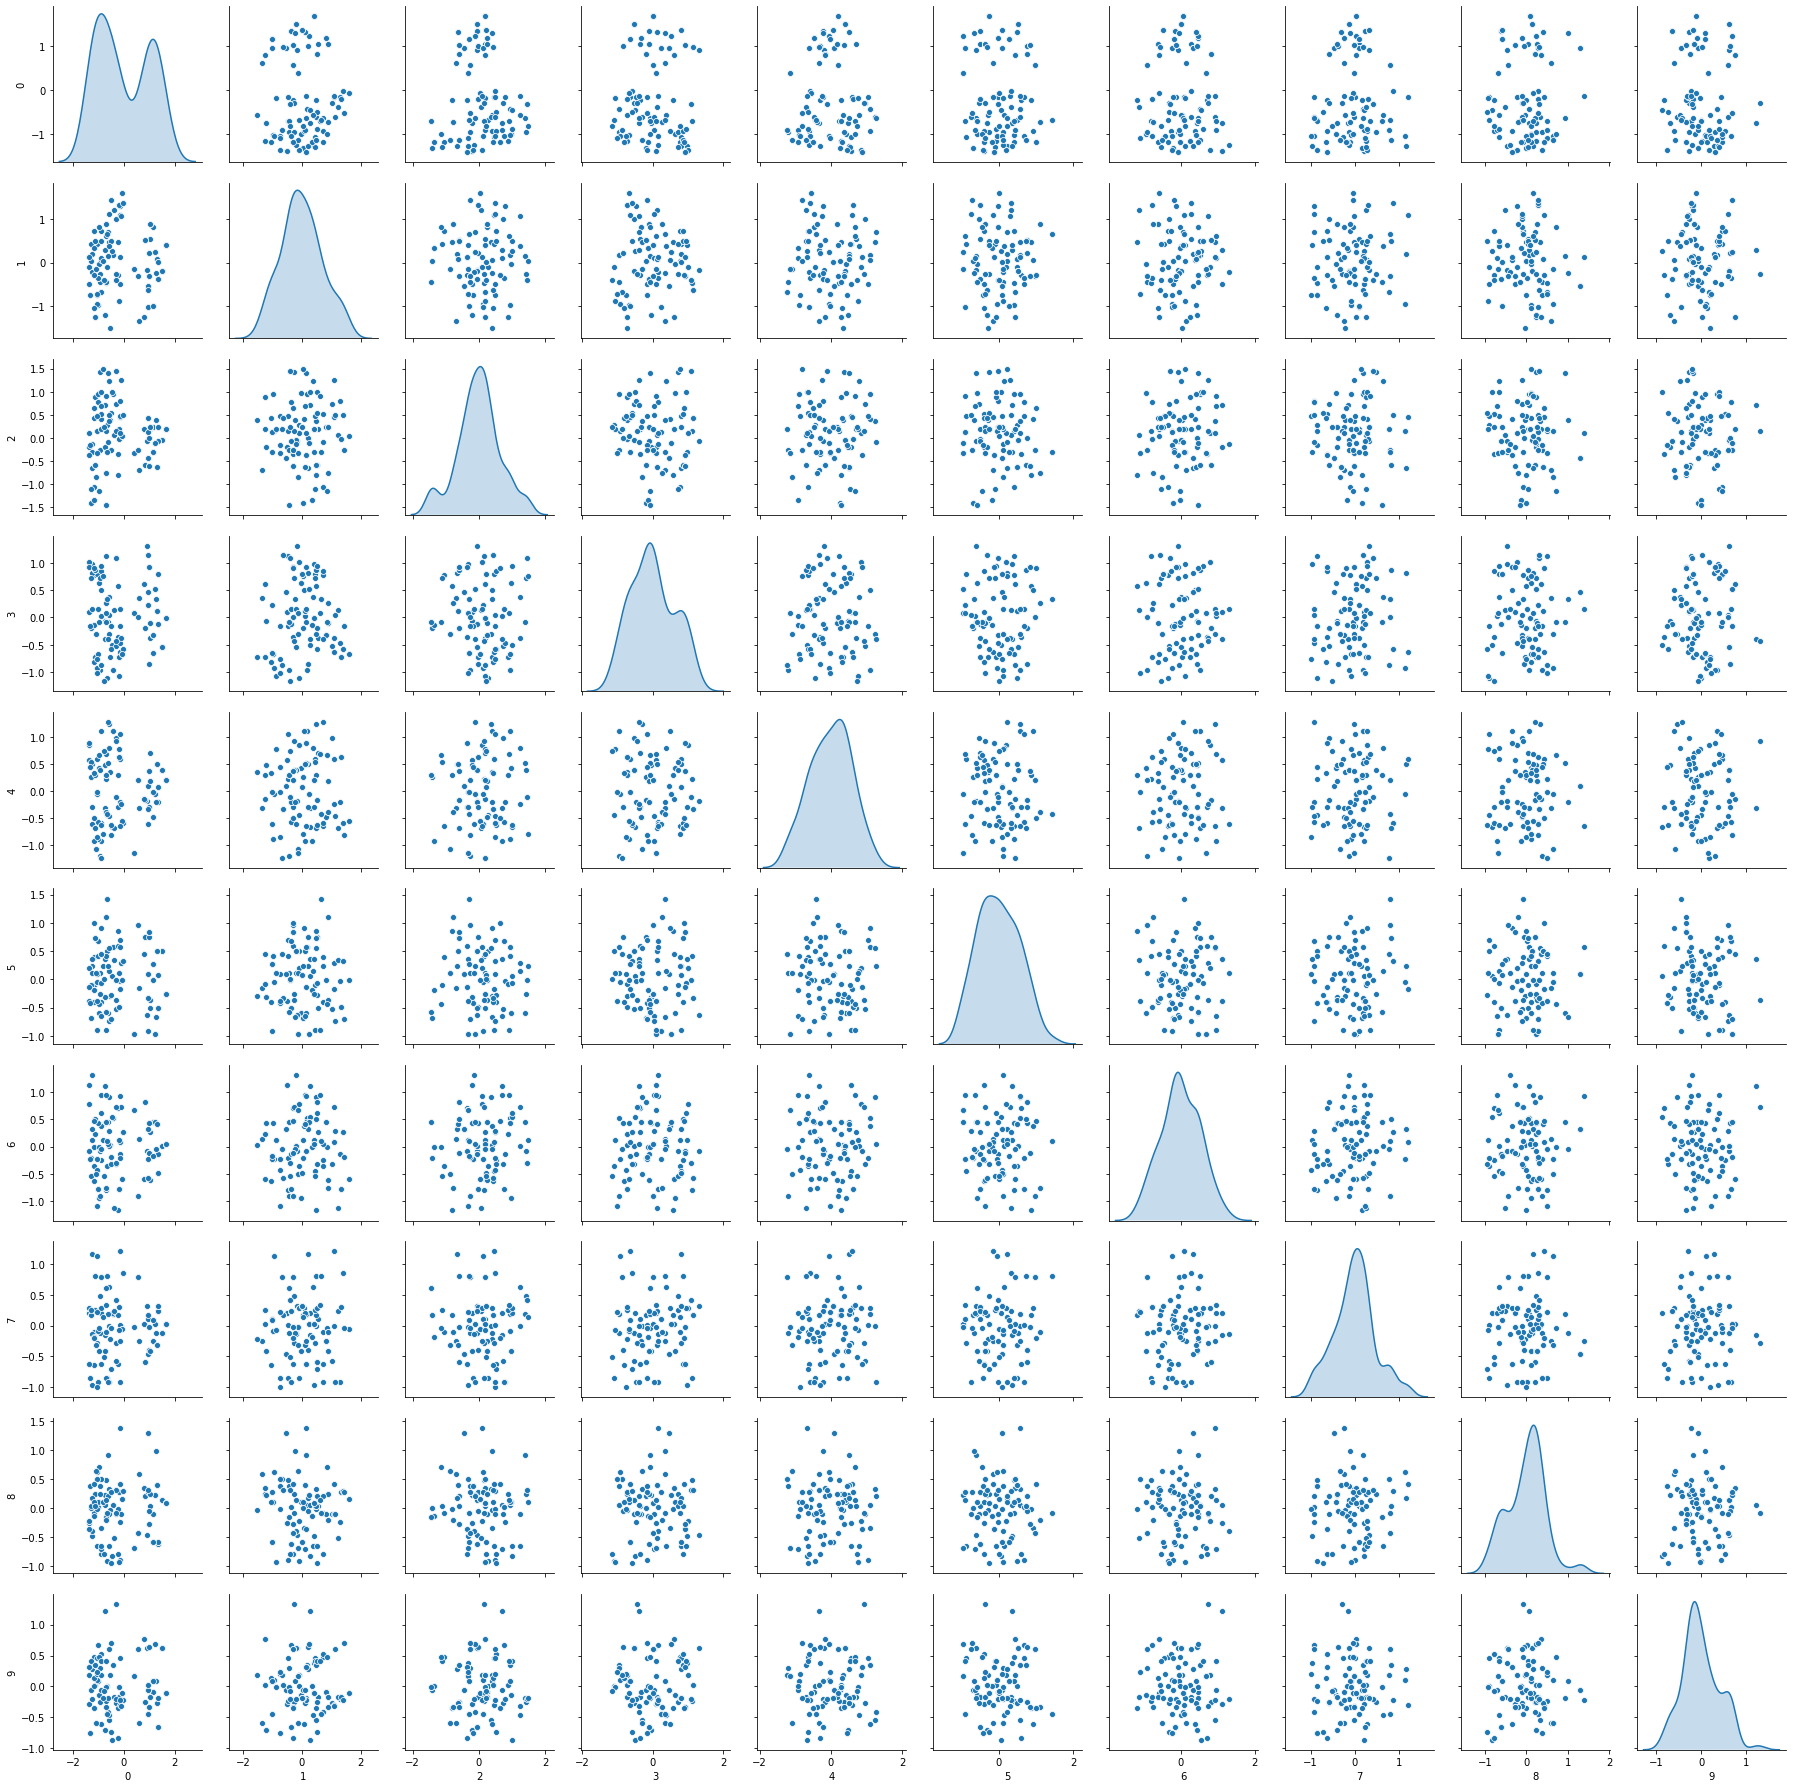

In [559]:
sns.pairplot(br_pca_df, diag_kind='kde')

Applying KMeans Clustering

In [560]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
cluster_errors = []

In [561]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 11 )
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=0)
  clusters.fit(xtrain_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [562]:
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,3150.000000
1,2,2451.841910
2,3,2182.567286
3,4,2024.066482
4,5,1894.217015
5,6,1738.180396
6,7,1674.221167
7,8,1579.558034
8,9,1523.739830
9,10,1429.356667


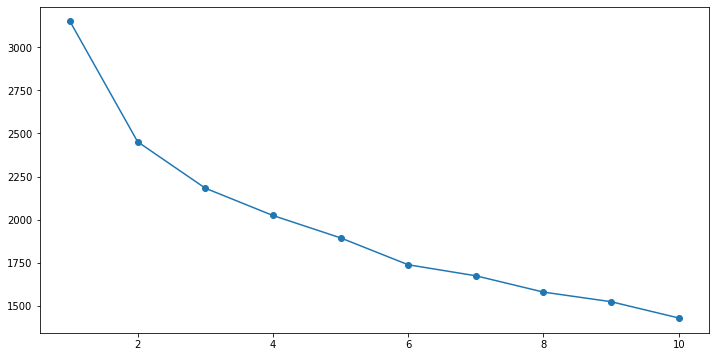

In [563]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

It is evident that the optimal number of clusters is 2, as the error rate reduces after 2 clusters

In [564]:
kmeans = KMeans(n_clusters=2, n_init = 10, random_state=1)
a=kmeans.fit_transform(bc_pca)

In [565]:
centroids=kmeans.cluster_centers_

In [566]:
centroid_df = pd.DataFrame(centroids, columns = list(bc_pca))

In [567]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [568]:
X_pcaDF = bc_pca_dff.join(df_labels)
X_pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-0.883144,0.759640,2.078160,-2.076005,-2.277191,1.109643,1.477077,0.154373,-0.162242,0.721731,1
1,-0.883144,0.759640,2.078160,-2.076005,-2.277191,1.109643,1.477077,0.154373,-0.162242,0.721731,1
2,2.105613,-0.076055,0.168143,-1.961868,0.765130,1.066529,1.151097,-1.199887,-0.220335,1.283015,0
3,2.130320,-0.922784,0.544782,-0.769058,-1.788984,-0.834955,0.276495,0.287093,0.253628,-0.364286,0
4,3.154178,0.629511,-0.235067,-1.115334,-0.655598,1.138847,0.395871,-0.313815,-0.102864,1.366736,0


In [569]:
X_test_std = StandardScaler().fit_transform(x_test)

In [570]:
X_test_pca = pca.transform(X_test_std)

In [571]:
X_test_pcaDF=pd.DataFrame(X_test_pca)

In [572]:
b=kmeans.fit_transform(X_test_pcaDF)

In [573]:
centroids_test=kmeans.cluster_centers_

In [574]:
centroid_test_df = pd.DataFrame(centroids_test, columns = list(X_test_pcaDF) )

In [575]:
df_test_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_test_labels['labels'] = df_test_labels['labels'].astype('category')

In [576]:
X_test_pcaDF = X_test_pcaDF.join(df_test_labels)
X_test_pcaDF.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-0.616201,0.793054,1.606649,1.194877,1.706586,-0.288139,-0.562075,-0.721031,0.001256,-0.031485,0
1,0.863162,0.393029,-1.160856,-0.571737,0.269578,3.005282,-0.868015,1.785225,-1.786254,1.068368,1
2,1.568062,0.393494,-1.616732,0.913692,0.518906,-2.601785,0.356229,0.476497,-1.199582,0.193734,1
3,2.551379,0.554578,-0.849755,-0.273941,0.253325,-0.943469,-0.143711,0.403312,-0.918316,-1.669518,1
4,-2.892213,0.614806,-0.218329,1.508148,-1.259923,1.096521,-1.308757,-1.125611,1.604031,-0.286359,0


In [577]:
from sklearn.svm import SVC

In [578]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1) #liner algo
svc_model.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [579]:
prediction = svc_model.predict(x_test)

In [580]:
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.9828571428571429
0.9866666666666667


In [581]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[33  0]
 [ 1 41]]


SVC with linear shows 98.6%